In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
#checking dataframe for null values
df.isna().sum()

BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [23]:
#dropping columns with majority null values
df = df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [27]:
#dropping rows with one or more null values
df = df.dropna()

In [41]:
#preparing categorical features to create dummy variables
cat_feats = df.drop(['Id', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'
                     , '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'
                    , 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], axis = 1)

In [46]:
#creating dummy variables for categorical features
cat_feats['MSSubClass'] = cat_feats['MSSubClass'].apply(lambda x: str(x))
dummies = pd.get_dummies(cat_feats, drop_first= True)

In [51]:
cat_feats.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [52]:
#dropping categorical features in lieu of dummy variables
df = df.drop(list(cat_feats.columns), axis = 1)

In [53]:
#joining dummy variables to original dataframe
df = pd.concat([df, dummies], axis = 1)

In [56]:
#dropping id column
df = df.drop('Id', axis =1)

In [57]:
df.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,2003,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,9600,6,8,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,11250,7,5,2001,2002,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,9550,7,5,1915,1970,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,8,5,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 240 entries, LotArea to SaleCondition_Partial
dtypes: float64(2), int64(33), uint8(205)
memory usage: 644.2 KB


In [59]:
from sklearn.model_selection import train_test_split

In [62]:
#setting up X & Y to predict Sales Price for homes
X= df.drop('SalePrice', axis = 1)
y= df['SalePrice']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
X_train = scaler.fit_transform(X_train)

In [67]:
X_test = scaler.transform(X_test)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [89]:
#building model to predict home prices
model = Sequential()

model.add(Dense(240, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(60, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'relu'))

model.compile(loss='mse', optimizer = 'adam')

In [90]:
#setting up model for early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 250)

model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), batch_size = 256, epochs = 1000, callbacks = [early_stop])

Epoch 1/1000
4/4 [==============================] - 0s 78ms/step - loss: 41854312448.0000 - val_loss: 39351971840.0000
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 41853784064.0000 - val_loss: 39351205888.0000
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 41852841984.0000 - val_loss: 39349891072.0000
Epoch 4/1000
4/4 [==============================] - 0s 12ms/step - loss: 41851260928.0000 - val_loss: 39347609600.0000
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 41848418304.0000 - val_loss: 39343673344.0000
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 41843388416.0000 - val_loss: 39337050112.0000
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 41835036672.0000 - val_loss: 39326322688.0000
Epoch 8/1000
4/4 [==============================] - 0s 14ms/step - loss: 41822670848.0000 - val_loss: 39309651968.0000
Epoch 9/1000
4/4 [==============================

Epoch 70/1000
4/4 [==============================] - 0s 19ms/step - loss: 6064637440.0000 - val_loss: 2908367104.0000
Epoch 71/1000
4/4 [==============================] - 0s 33ms/step - loss: 5825431552.0000 - val_loss: 2885415680.0000
Epoch 72/1000
4/4 [==============================] - 0s 19ms/step - loss: 5539449856.0000 - val_loss: 2860244992.0000
Epoch 73/1000
4/4 [==============================] - 0s 21ms/step - loss: 5516870656.0000 - val_loss: 2831498752.0000
Epoch 74/1000
4/4 [==============================] - 0s 14ms/step - loss: 5931767296.0000 - val_loss: 2794061056.0000
Epoch 75/1000
4/4 [==============================] - 0s 9ms/step - loss: 5688890880.0000 - val_loss: 2759883776.0000
Epoch 76/1000
4/4 [==============================] - 0s 9ms/step - loss: 5365650944.0000 - val_loss: 2722519552.0000
Epoch 77/1000
4/4 [==============================] - 0s 9ms/step - loss: 5501752320.0000 - val_loss: 2690900736.0000
Epoch 78/1000
4/4 [==============================] - 0s 9ms

Epoch 139/1000
4/4 [==============================] - 0s 14ms/step - loss: 4050008320.0000 - val_loss: 1601604352.0000
Epoch 140/1000
4/4 [==============================] - 0s 23ms/step - loss: 4183463680.0000 - val_loss: 1607120896.0000
Epoch 141/1000
4/4 [==============================] - 0s 14ms/step - loss: 4128463872.0000 - val_loss: 1605543936.0000
Epoch 142/1000
4/4 [==============================] - 0s 19ms/step - loss: 3626199808.0000 - val_loss: 1576090752.0000
Epoch 143/1000
4/4 [==============================] - 0s 10ms/step - loss: 3791761152.0000 - val_loss: 1553347968.0000
Epoch 144/1000
4/4 [==============================] - 0s 9ms/step - loss: 3861309696.0000 - val_loss: 1537483008.0000
Epoch 145/1000
4/4 [==============================] - 0s 9ms/step - loss: 3880995584.0000 - val_loss: 1528466176.0000
Epoch 146/1000
4/4 [==============================] - 0s 9ms/step - loss: 3874601216.0000 - val_loss: 1515428992.0000
Epoch 147/1000
4/4 [==============================]

4/4 [==============================] - 0s 10ms/step - loss: 3373314304.0000 - val_loss: 1066856320.0000
Epoch 209/1000
4/4 [==============================] - 0s 9ms/step - loss: 3097529856.0000 - val_loss: 1049603392.0000
Epoch 210/1000
4/4 [==============================] - 0s 9ms/step - loss: 3637694464.0000 - val_loss: 1053317760.0000
Epoch 211/1000
4/4 [==============================] - 0s 9ms/step - loss: 3616593920.0000 - val_loss: 1062519040.0000
Epoch 212/1000
4/4 [==============================] - 0s 9ms/step - loss: 3099840512.0000 - val_loss: 1081944960.0000
Epoch 213/1000
4/4 [==============================] - 0s 10ms/step - loss: 3299679232.0000 - val_loss: 1107596672.0000
Epoch 214/1000
4/4 [==============================] - 0s 12ms/step - loss: 3570461184.0000 - val_loss: 1109528448.0000
Epoch 215/1000
4/4 [==============================] - 0s 17ms/step - loss: 3108399104.0000 - val_loss: 1082067712.0000
Epoch 216/1000
4/4 [==============================] - 0s 13ms/step 

4/4 [==============================] - 0s 10ms/step - loss: 3028481536.0000 - val_loss: 885993600.0000
Epoch 278/1000
4/4 [==============================] - 0s 12ms/step - loss: 2907315200.0000 - val_loss: 890171584.0000
Epoch 279/1000
4/4 [==============================] - 0s 10ms/step - loss: 2919040768.0000 - val_loss: 890727296.0000
Epoch 280/1000
4/4 [==============================] - 0s 10ms/step - loss: 2809999616.0000 - val_loss: 879627584.0000
Epoch 281/1000
4/4 [==============================] - 0s 37ms/step - loss: 3308181760.0000 - val_loss: 867272960.0000
Epoch 282/1000
4/4 [==============================] - 0s 12ms/step - loss: 3296088832.0000 - val_loss: 866075264.0000
Epoch 283/1000
4/4 [==============================] - 0s 11ms/step - loss: 3047257856.0000 - val_loss: 881937344.0000
Epoch 284/1000
4/4 [==============================] - 0s 11ms/step - loss: 3115066112.0000 - val_loss: 897005888.0000
Epoch 285/1000
4/4 [==============================] - 0s 10ms/step - lo

4/4 [==============================] - 0s 10ms/step - loss: 2859335424.0000 - val_loss: 798343744.0000
Epoch 347/1000
4/4 [==============================] - 0s 12ms/step - loss: 2708645376.0000 - val_loss: 796340928.0000
Epoch 348/1000
4/4 [==============================] - 0s 13ms/step - loss: 2965346048.0000 - val_loss: 787963968.0000
Epoch 349/1000
4/4 [==============================] - 0s 15ms/step - loss: 2942452224.0000 - val_loss: 776989760.0000
Epoch 350/1000
4/4 [==============================] - 0s 11ms/step - loss: 3152375296.0000 - val_loss: 788047680.0000
Epoch 351/1000
4/4 [==============================] - 0s 10ms/step - loss: 2815571968.0000 - val_loss: 790197696.0000
Epoch 352/1000
4/4 [==============================] - 0s 10ms/step - loss: 2999072256.0000 - val_loss: 790901824.0000
Epoch 353/1000
4/4 [==============================] - 0s 10ms/step - loss: 3116299264.0000 - val_loss: 804824064.0000
Epoch 354/1000
4/4 [==============================] - 0s 9ms/step - los

4/4 [==============================] - 0s 19ms/step - loss: 3163439360.0000 - val_loss: 730954048.0000
Epoch 416/1000
4/4 [==============================] - 0s 24ms/step - loss: 2744210944.0000 - val_loss: 734492224.0000
Epoch 417/1000
4/4 [==============================] - 0s 24ms/step - loss: 3119597056.0000 - val_loss: 764299968.0000
Epoch 418/1000
4/4 [==============================] - 0s 18ms/step - loss: 2934489856.0000 - val_loss: 793222656.0000
Epoch 419/1000
4/4 [==============================] - 0s 15ms/step - loss: 2646142976.0000 - val_loss: 793122688.0000
Epoch 420/1000
4/4 [==============================] - 0s 17ms/step - loss: 2832085248.0000 - val_loss: 772677824.0000
Epoch 421/1000
4/4 [==============================] - 0s 17ms/step - loss: 2808546304.0000 - val_loss: 759641216.0000
Epoch 422/1000
4/4 [==============================] - 0s 16ms/step - loss: 3022320896.0000 - val_loss: 774242688.0000
Epoch 423/1000
4/4 [==============================] - 0s 16ms/step - lo

4/4 [==============================] - 0s 15ms/step - loss: 2870813184.0000 - val_loss: 733664704.0000
Epoch 485/1000
4/4 [==============================] - 0s 14ms/step - loss: 2688706048.0000 - val_loss: 757105920.0000
Epoch 486/1000
4/4 [==============================] - 0s 14ms/step - loss: 2649021440.0000 - val_loss: 738332992.0000
Epoch 487/1000
4/4 [==============================] - 0s 12ms/step - loss: 2778880256.0000 - val_loss: 702502656.0000
Epoch 488/1000
4/4 [==============================] - 0s 14ms/step - loss: 2803615232.0000 - val_loss: 688572096.0000
Epoch 489/1000
4/4 [==============================] - 0s 13ms/step - loss: 2688734464.0000 - val_loss: 689757376.0000
Epoch 490/1000
4/4 [==============================] - 0s 14ms/step - loss: 2839921152.0000 - val_loss: 713932416.0000
Epoch 491/1000
4/4 [==============================] - 0s 13ms/step - loss: 2847997440.0000 - val_loss: 742828608.0000
Epoch 492/1000
4/4 [==============================] - 0s 13ms/step - lo

4/4 [==============================] - 0s 14ms/step - loss: 2730967808.0000 - val_loss: 673315136.0000
Epoch 554/1000
4/4 [==============================] - 0s 15ms/step - loss: 2709297408.0000 - val_loss: 693783552.0000
Epoch 555/1000
4/4 [==============================] - 0s 16ms/step - loss: 2249887744.0000 - val_loss: 724280960.0000
Epoch 556/1000
4/4 [==============================] - 0s 18ms/step - loss: 2843659776.0000 - val_loss: 729424960.0000
Epoch 557/1000
4/4 [==============================] - 0s 17ms/step - loss: 2589065728.0000 - val_loss: 711220224.0000
Epoch 558/1000
4/4 [==============================] - 0s 14ms/step - loss: 2586145536.0000 - val_loss: 691179648.0000
Epoch 559/1000
4/4 [==============================] - 0s 14ms/step - loss: 2511220480.0000 - val_loss: 680757376.0000
Epoch 560/1000
4/4 [==============================] - 0s 13ms/step - loss: 2657573120.0000 - val_loss: 687663936.0000
Epoch 561/1000
4/4 [==============================] - 0s 15ms/step - lo

4/4 [==============================] - 0s 14ms/step - loss: 2813901568.0000 - val_loss: 725526656.0000
Epoch 623/1000
4/4 [==============================] - 0s 14ms/step - loss: 2753267456.0000 - val_loss: 687798720.0000
Epoch 624/1000
4/4 [==============================] - 0s 17ms/step - loss: 2859712000.0000 - val_loss: 664733120.0000
Epoch 625/1000
4/4 [==============================] - 0s 13ms/step - loss: 2528815872.0000 - val_loss: 676928832.0000
Epoch 626/1000
4/4 [==============================] - 0s 12ms/step - loss: 2600145664.0000 - val_loss: 712039936.0000
Epoch 627/1000
4/4 [==============================] - 0s 14ms/step - loss: 2520485888.0000 - val_loss: 742780864.0000
Epoch 628/1000
4/4 [==============================] - 0s 12ms/step - loss: 2816628736.0000 - val_loss: 750026944.0000
Epoch 629/1000
4/4 [==============================] - 0s 11ms/step - loss: 2355208192.0000 - val_loss: 725253888.0000
Epoch 630/1000
4/4 [==============================] - 0s 13ms/step - lo

4/4 [==============================] - 0s 13ms/step - loss: 2642800640.0000 - val_loss: 660090624.0000
Epoch 692/1000
4/4 [==============================] - 0s 13ms/step - loss: 2709614592.0000 - val_loss: 683922432.0000
Epoch 693/1000
4/4 [==============================] - 0s 14ms/step - loss: 2363833088.0000 - val_loss: 705504320.0000
Epoch 694/1000
4/4 [==============================] - 0s 22ms/step - loss: 2562467072.0000 - val_loss: 738452800.0000
Epoch 695/1000
4/4 [==============================] - 0s 12ms/step - loss: 2410344448.0000 - val_loss: 746165824.0000
Epoch 696/1000
4/4 [==============================] - 0s 27ms/step - loss: 2930374400.0000 - val_loss: 706531712.0000
Epoch 697/1000
4/4 [==============================] - 0s 14ms/step - loss: 2871076096.0000 - val_loss: 671525120.0000
Epoch 698/1000
4/4 [==============================] - 0s 13ms/step - loss: 2544620032.0000 - val_loss: 651328640.0000
Epoch 699/1000
4/4 [==============================] - 0s 13ms/step - lo

4/4 [==============================] - 0s 14ms/step - loss: 2471552000.0000 - val_loss: 709825664.0000
Epoch 761/1000
4/4 [==============================] - 0s 16ms/step - loss: 2648971264.0000 - val_loss: 731270976.0000
Epoch 762/1000
4/4 [==============================] - 0s 14ms/step - loss: 2818010112.0000 - val_loss: 722953536.0000
Epoch 763/1000
4/4 [==============================] - 0s 15ms/step - loss: 2514021632.0000 - val_loss: 700907776.0000
Epoch 764/1000
4/4 [==============================] - 0s 14ms/step - loss: 2534550528.0000 - val_loss: 664936064.0000
Epoch 765/1000
4/4 [==============================] - 0s 15ms/step - loss: 2562484992.0000 - val_loss: 647728576.0000
Epoch 766/1000
4/4 [==============================] - 0s 14ms/step - loss: 2677859328.0000 - val_loss: 657316160.0000
Epoch 767/1000
4/4 [==============================] - 0s 13ms/step - loss: 2635849984.0000 - val_loss: 708555456.0000
Epoch 768/1000
4/4 [==============================] - 0s 15ms/step - lo

4/4 [==============================] - 0s 13ms/step - loss: 2644046080.0000 - val_loss: 750731904.0000
Epoch 830/1000
4/4 [==============================] - 0s 14ms/step - loss: 2621953536.0000 - val_loss: 720966016.0000
Epoch 831/1000
4/4 [==============================] - 0s 14ms/step - loss: 2602206976.0000 - val_loss: 681956096.0000
Epoch 832/1000
4/4 [==============================] - 0s 13ms/step - loss: 2839150080.0000 - val_loss: 653179904.0000
Epoch 833/1000
4/4 [==============================] - 0s 15ms/step - loss: 2707208704.0000 - val_loss: 645535488.0000
Epoch 834/1000
4/4 [==============================] - 0s 14ms/step - loss: 2382464256.0000 - val_loss: 645167104.0000
Epoch 835/1000
4/4 [==============================] - 0s 13ms/step - loss: 2496853504.0000 - val_loss: 679686144.0000
Epoch 836/1000
4/4 [==============================] - 0s 11ms/step - loss: 2287465216.0000 - val_loss: 726167488.0000
Epoch 837/1000
4/4 [==============================] - 0s 15ms/step - lo

4/4 [==============================] - 0s 12ms/step - loss: 2372530688.0000 - val_loss: 709529728.0000
Epoch 899/1000
4/4 [==============================] - 0s 13ms/step - loss: 2896458240.0000 - val_loss: 704159232.0000
Epoch 900/1000
4/4 [==============================] - 0s 12ms/step - loss: 2620477184.0000 - val_loss: 686506304.0000
Epoch 901/1000
4/4 [==============================] - 0s 12ms/step - loss: 2675343104.0000 - val_loss: 700275008.0000
Epoch 902/1000
4/4 [==============================] - 0s 11ms/step - loss: 2423760384.0000 - val_loss: 717061952.0000
Epoch 903/1000
4/4 [==============================] - 0s 12ms/step - loss: 2620390400.0000 - val_loss: 731457152.0000
Epoch 904/1000
4/4 [==============================] - 0s 11ms/step - loss: 2432825600.0000 - val_loss: 730929152.0000
Epoch 905/1000
4/4 [==============================] - 0s 12ms/step - loss: 2462840320.0000 - val_loss: 726897792.0000
Epoch 906/1000
4/4 [==============================] - 0s 11ms/step - lo

4/4 [==============================] - 0s 14ms/step - loss: 2393644800.0000 - val_loss: 734654016.0000
Epoch 968/1000
4/4 [==============================] - 0s 15ms/step - loss: 2540615680.0000 - val_loss: 712804672.0000
Epoch 969/1000
4/4 [==============================] - 0s 15ms/step - loss: 2504977920.0000 - val_loss: 697142848.0000
Epoch 970/1000
4/4 [==============================] - 0s 14ms/step - loss: 2732130048.0000 - val_loss: 697678336.0000
Epoch 971/1000
4/4 [==============================] - 0s 15ms/step - loss: 2106891776.0000 - val_loss: 693061696.0000
Epoch 972/1000
4/4 [==============================] - 0s 15ms/step - loss: 2503881984.0000 - val_loss: 714985024.0000
Epoch 973/1000
4/4 [==============================] - 0s 12ms/step - loss: 2403257856.0000 - val_loss: 753813184.0000
Epoch 974/1000
4/4 [==============================] - 0s 11ms/step - loss: 2547528448.0000 - val_loss: 752932480.0000
Epoch 975/1000
4/4 [==============================] - 0s 13ms/step - lo

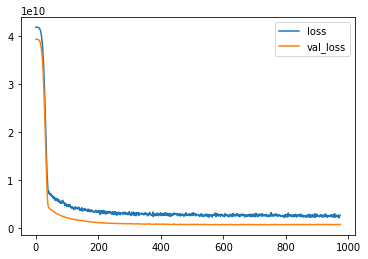

In [91]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
#loss and validation loss vs. epochs

In [95]:
#comparing predictions to actual values
predictions = model.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [98]:
mean_squared_error(y_test,predictions)

711806048.0891163

In [99]:
np.sqrt(mean_squared_error(y_test,predictions))

26679.69355313356

In [100]:
explained_variance_score(y_test, predictions)

0.8726771524995405

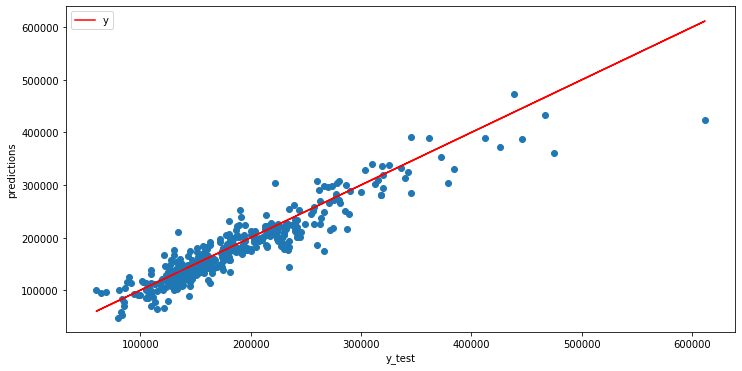

In [111]:
plt.figure(figsize = (12,6))
plt.scatter(x = y_test, y= predictions)
plt.plot(y_test, y_test, 'r')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.legend('y')